# Data inspection

In [1]:
from LensingUtils import *

In [2]:
import os,sys
import numpy as np
import matplotlib.pyplot as plt

## We will load the SLICS maps data ($\kappa$) and convert it to a log-normal distribution.

In [12]:
data_dir = '/gpfs02/work/jarmijo/KappaMaps/SLICS_Cov/'
list_names = os.listdir(data_dir)
#data_maps = [np.load(data_dir+l) for l in list_names]

In [4]:
#Functions inside LensingUtils use numba optimization. It should be fast
lognorm_kappa,mu,sigma = shifted_logN_kappa_samples(data_maps)

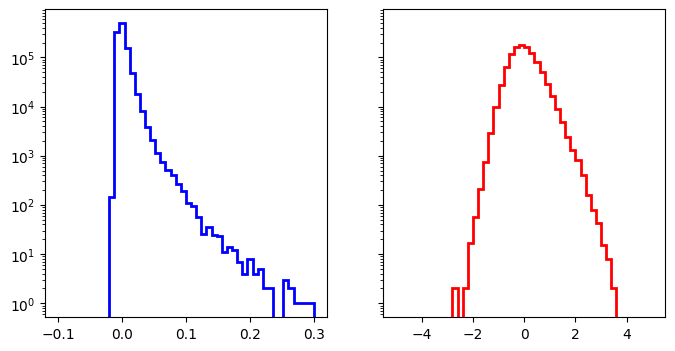

In [5]:
f,ax = plt.subplots(1,2,figsize=(8,4),sharey=True)
ax[0].hist(data_maps[0].flatten(),bins=50,range=(-0.1,0.3),histtype='step',color='b',lw=2)
ax[1].hist(lognorm_kappa[0].flatten(),bins=50,range=(-5,5),histtype='step',color='r',lw=2)
ax[0].set_yscale('log')
plt.show()

# Save data to use for training

In [17]:
for i in range(len(data_maps)):
    np.save('/gpfs02/work/jarmijo/KappaMaps/norm_quad_SLICS_Cov/slics_norm/log_'+list_names[i],lognorm_kappa[i])
np.save('/gpfs02/work/jarmijo/KappaMaps/norm_quad_SLICS_Cov/slics_norm/logkappa_mu_sigma_maps.npy',np.array([mu,sigma]).T)